In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skbio.stats.ordination import pcoa 

class DataFrameValidationError(Exception):
    def __init__(self):
        super().__init__(f"The input used doesn't have the correct format. Please check your input and try again.")

def composition(CountsDataFrame, options:str):
    """
    Transform the counts table into compositions:

    Args:
    _____
    DataFrame (int): Dataframe containing count values
    options:
    freq - Transform the table into frequencies
    perc - Transform the table into percentages

    Return:
    _______
        Dataframe containing compositional data
    """

    CountsDataFrame = CountsDataFrame.replace(0,1)
    if validate_counts(CountsDataFrame) ==False:
        raise DataFrameValidationError
    else:
        match options:
            case "freq":
                return(CountsDataFrame.div(CountsDataFrame.sum(axis=0)))
            case "perc":
                return(CountsDataFrame.div(CountsDataFrame.sum(axis=0))*100)

def validate_counts(DataFrame):
    """
    Validate the input to check if the sum of components is
    
    different from a pre-defined upper-limit (1 or 100).
    Args:
    _____
    DataFrame (int): Dataframe containing count values

    Return:
    _______
        Boolean variable
    """
    return(all(round(DataFrame.sum(),1)!=1.0) and all(DataFrame.sum()!=100.0))

def validate_composition(DataFrame):
    """
    Validate the input to check if the sum of components is 1 or 100.
    
    Args:
    _____
    DataFrame (float): Dataframe containing compositional data

    Return:
    _______
        Boolean variable
    """
    return(all(round(DataFrame.sum(),1)==1.0) or all(round(DataFrame.sum(),1)==100.0))
    
def clr(DataFrame):
    """
    Transform the compositional table into Centered log-ratios
    CLR = log(Composition/geometric mean)

    Args:
    _____
    DataFrame (float): Dataframe containing compositional data.

    Return:
    _______
        CLR transformed dataframe
    """
    if validate_composition(DataFrame) ==False:
        raise DataFrameValidationError
    else:
        DataFrame = DataFrame.T
        gmeans = np.log(DataFrame).mean()
        clr = np.log(DataFrame)-gmeans
        return(clr)


def Aitchison_Distance(Dataframe):
    """
    Calculate the euclidian distance between samples based on CLR transformed data.

    Args:
    _____
    DataFrame (float): Dataframe containing clr-transformed data.
    
    Return:
    _______
    Dataframe containing the euclidian distance between samples.
    """
    aitchison_distance = squareform(pdist(Dataframe))
    aitchison_distance = pd.DataFrame(aitchison_distance, index=Dataframe.index, columns=Dataframe.index)
    return aitchison_distance

def pcoaPlot(DataFrameDistance, Metadata):
    """
    Calculate the pcoa from A distance matrix and displays it using a a scatter plot.

    Args:
    _____
    DataFrameDistance (float): Dataframe containing a distance, such as Aitchison distance.
    But can be in fact any distance.
    Metadata (string): A grouping factor used to color code the samples.
    
    Return:
    _______
    a scatter plot.
    """
    pcoa_results = pcoa(DataFrameDistance)
    sns.relplot(data=pcoa_results.samples[["PC1","PC2"]], x = "PC1", y="PC2", hue=Metadata)
    


<div style = "padding-top:10px; padding-bottom:10px;">
    <h4>Exercise 1:</h4>
    <p>Load the ASVTable.tsv, Taxonomy_table.tsv, alpha_diversity.tsv and metadata.tsv in corresponding variables (Be mindful of the variable name) using the read_table() method, and set the attribute index_col = 0.</p>
</div>

<div style = "padding-top:10px; padding-bottom:10px;">
    <h4>Exercise 2:</h4>
    <p>Transform the asvs into a composition (Either frequencies or percentages and save it into a new variable. Which ASV is the most abundant in the first sample?. Query the taxonomy table to identify the taxonomy information of this particular ASV. What is the highest taxonomical level you can identify?</p>
    <p>To select the first sample you will need to use the method <strong>.iloc[0]</strong>, and to identify the most abundant one, you will need to sort the values :).</p>
</div>

<div style = "padding-top:10px; padding-bottom:10px;">
    <h4>Exercise 3:</h4>
    <p>For this exercise you will merge the asvs with the metadata using their indexes and group the whole dataframe using the columns <strong>"Diet"</strong> and <strong>"Biome"</strong>, and yes, we will do a 2 level grouping. After that you will calculate their mean value (use the .mean() method) and then transpose the dataframe. Can you identify the most abundant ASV in each Biome for the Byproduct diet? What are their taxonomic information?</p>
</div>

<div style = "padding-top:10px; padding-bottom:10px;">
    <p>Next, create two new variables to contain count data for only samples fed Conventional or Byproduct diets, it sounds difficult but this is far from the truth. When you did the 2-level grouping, each diet became a column containing all the information, so, if you call your grouped dataframe passing the name of a diet, like "Byproduct", you will have everything ready. Quite handy, isn't it?</p>
</div>

<div style = "padding-top:10px; padding-bottom:10px;">
    <p>Can you identify the most abundant ASV in each Biome for the Byproduct diet? What are their taxonomic information?</p>
</div>

<div style = "padding-top:10px; padding-bottom:10px;">
    <h4>Exercise 4:</h4>
    <p>For this exercise we will merge the Dataframe containing the counts of all samples with the Taxonomy dataframe. Do the same with the grouped dataframes. Save them into new variables and save it for later. Pay attention to the orientation of the tables' axis (You will have to transpose one of the ASV tables before the merging, which one will be???)</p>
</div>

<div style = "padding-top:10px; padding-bottom:10px;">
    <h4>Exercise 5:</h4>
    <p>For this one we will transform our data into <strong>Centred log-ratio</strong>. For that we will start with the composition table, however... you will have to re-make it. Why you ask? It's because you can't divide anything by 0. How can we solve it? We need to add a pseudo-count. In other words, we will change any 0 by one in the original table and then, and only then we will recalculate our composition.</p>
    <p>To do that we will do the following:</p>
    <p><center><span>full_Asvs<strong>.replace</strong>(0,1, inplace=<span style="color:green">True</span>)</span></strong></p>
</div>

<div style = "padding-top:10px; padding-bottom:10px;">
    <p>After you transform your CLR dataframe, do a sanity check. The sum of each transformed ASV should be zero or something <strong>REALLY</strong> close to zero. If this is not the case, go back to your code because you certainly made a mistake (Which is <span style="color:blue;font-weight:bold;">ok</span>).</p>
</div>


<div style = "padding-top:10px; padding-bottom:10px;">
    <h4>Exercise 6:</h4>
    <p>Let's revisit the output of <strong>Exercise 4</strong>. Use them to create a stacked barplot for <strong style="color:green;">Genus</strong> level. Can you also do it for <strong style="color:blue;">Family</strong> level? No? ok, I'll give you some hints:</p>
    <ol>
      <li>You will drop all rows with the unwanted taxonomic levels using the <em>drop</em> method, like this:</li>  
        <ul><li>dataframe.drop([..."Class", "Family"])</li></ul>
    <li>You will group the dataframe using the Dataframe using the desired taxonomic level as the grouping factor, and chain this using the <strong>.sum()</strong> method.</li>
        <li>Then you will transform it into a composition! Now you can create a barplot.</li>
    </ol>
</div>

<div style = "padding-top:10px; padding-bottom:10px;">
    <p>The plot is ugly as hell and it doesn't make much sense at all! How can we fix it and improve it?</p>
    <p>Well, first we need to sort the values of the compositional table, to "order" the components of the plot itself. Then we need to limit the number of elements in the legend and change the position of the legend.</p>
    <p>To limit the number of elements of the legend you will have to:</p>
    <ol>
      <li>Remake the plot by creating an <strong>ax</strong>, a subplot object in matplotlib.</li>  
    <li>Then you will extract the handles and labels from the object.</li>
    <li>You will then select a "slice" of it, let's say, the top 10 and update the legend.</li>
    </ol>
    <p>I will show how to do it using an example bellow:</p>
</div>

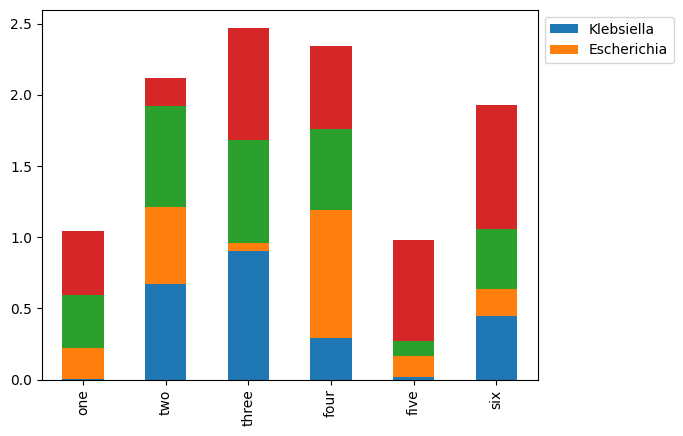

In [150]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 
                         'six'],
                  columns=pd.Index(['Klebsiella', 'Escherichia', 
                                    'Pneumonas', 'Treponema'], name='Genus'))
ax = df.plot(kind="bar", stacked=True)

"""
I will limit the number of elements in the legend to the first 2 (not the top 2, this you
will have to figure it out yourselves)
"""

handles, labels = ax.get_legend_handles_labels()

# Limit the number of elements in the legend to the top 2
limited_handles = handles[:2]
limited_labels = labels[:2]
ax.legend(limited_handles, limited_labels, loc='upper left', bbox_to_anchor=(1, 1))

"""
The loc attribute will place the legend in a region of the plot, and the bbox_to_anchor

will accept two coordinates, so you can play with it to position your legend accuratelly.
"""

<p>Now you do it yourself!</p>

<div style = "padding-top:10px; padding-bottom:10px;">
    <h4>Exercise 7:</h4>
    <p>Create a strip plot using the alpha diversity data! (Shannon diversity or richness)</p>
</div>

<p>It looks suspicioulsy similar to a boxplot, doesn't it? Why don't you give it a go and create a boxplot? Just change the name catplot to boxplot :).</p>

<div style = "padding-top:10px; padding-bottom:10px;">
    <h4>Exercise 8:</h4>
    <p>Lastly, transform your compositional data frame containing ASV level data (From exercise <strong>4</strong> and use it to calculate the aitchison distance. We have a function for it inside the first cell on this notebook called <strong>Aitchison_Distance</strong>, check it's details to understand what type of data the function will accept.</p> 
    <p>Use the transformed Dataframe as input to a PcoA analysis and plot the result.  and use the output to generate the Principal Coordinate analysis. Use the output of the provided functions to create a relplot using seaborn. Luckily we also have a function for that called <strong>pcoaPlot</strong>. You are very welcome.</p>
</div>